# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [40]:
dados= pd.read_csv('dados.csv')
dados.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58,3,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52,8,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,0,1,1,0,46,2,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,29,3,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,27,4,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [41]:
y = dados.mau

In [42]:
X = dados.drop('mau', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=171)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [44]:
clf = DecisionTreeClassifier(random_state=171)
clf = clf.fit(X_train,y_train)

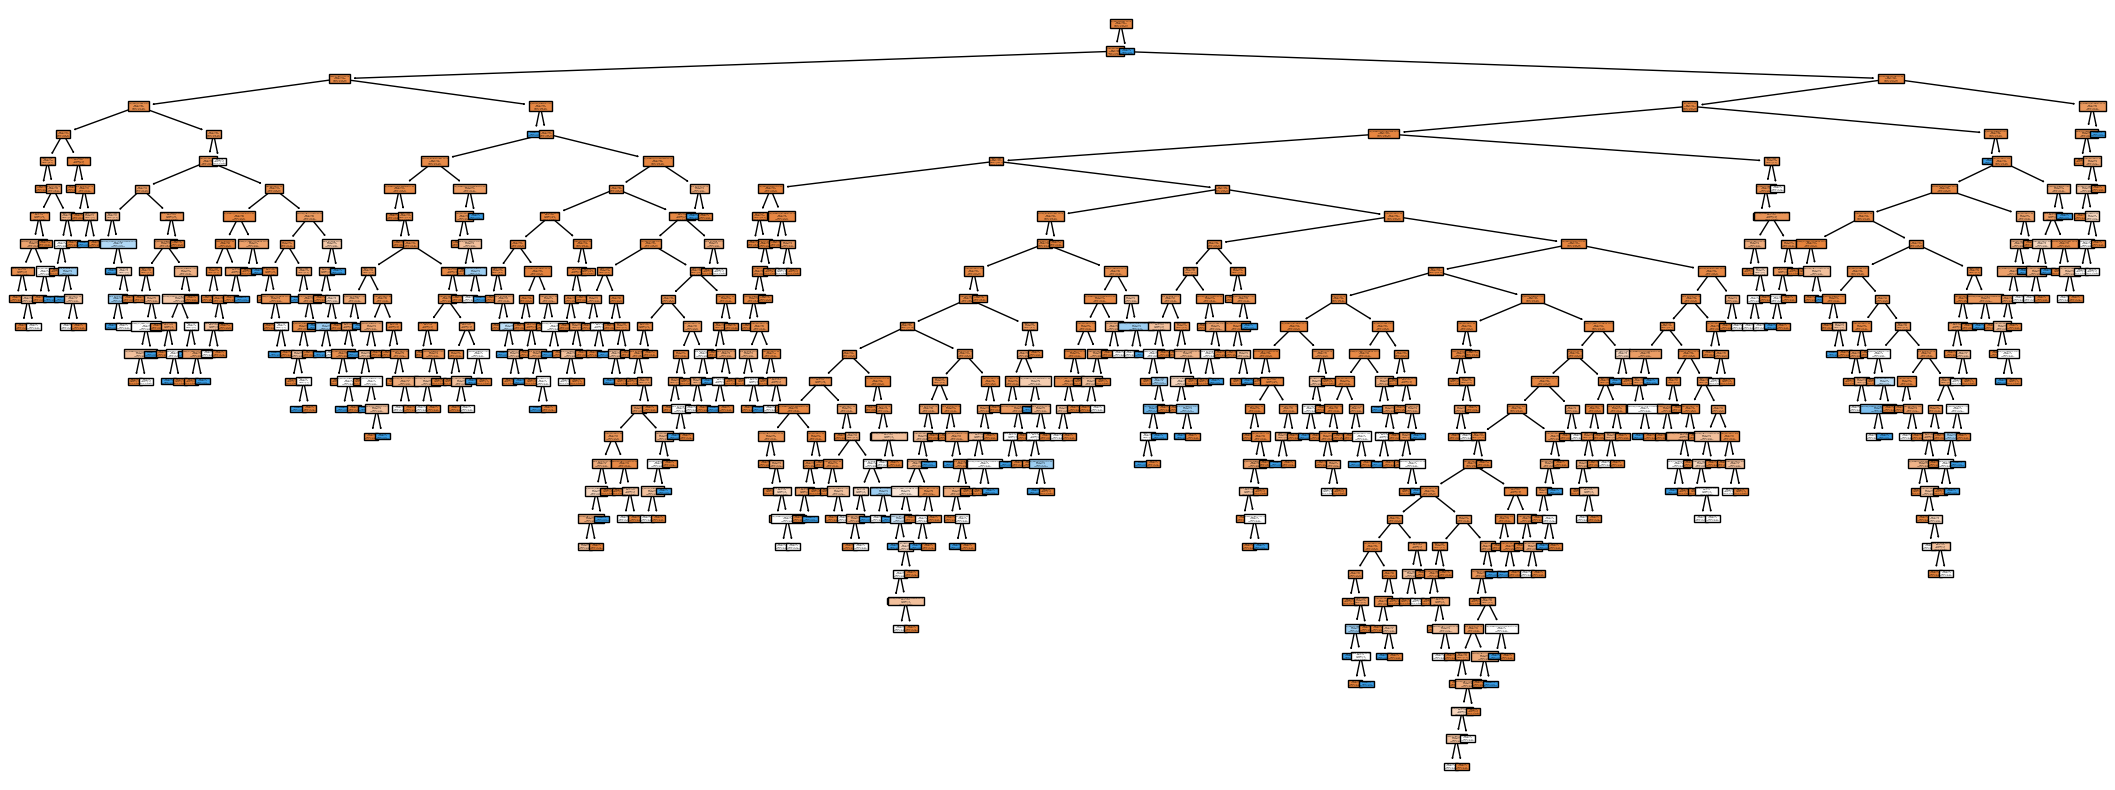

In [45]:
plt.figure(figsize=(27, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X.columns));

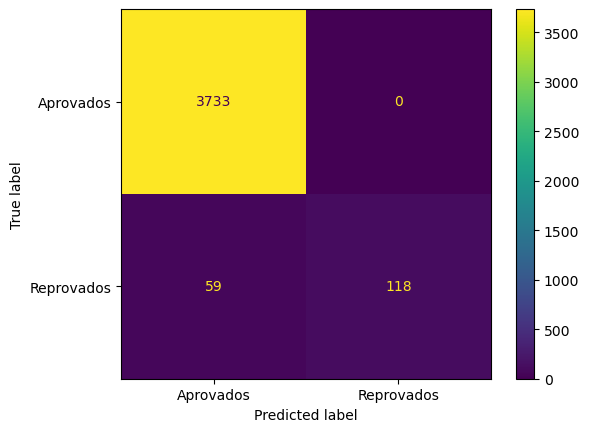

In [46]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [47]:
accuracy_score(y_train, clf.predict(X_train))

0.9849104859335038

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

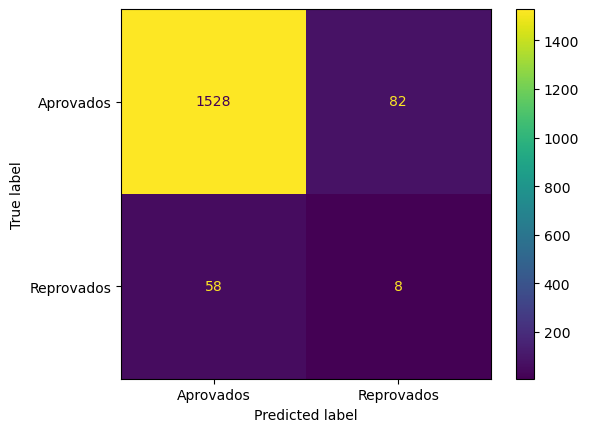

In [48]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [49]:
y_chapeu_teste = clf.predict(X_test)

In [50]:
accuracy_score(y_test, y_chapeu_teste)

0.9164677804295943

In [51]:
X_test.shape

(1676, 28)

In [52]:
(1528+8)/1676

0.9164677804295943

In [56]:
#4 
clf_ajustado = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_ajustado = clf_ajustado.fit(X_train,y_train)
predict = clf_ajustado.predict(X_test)
accuracy_score(y_test, predict)


0.9552505966587113

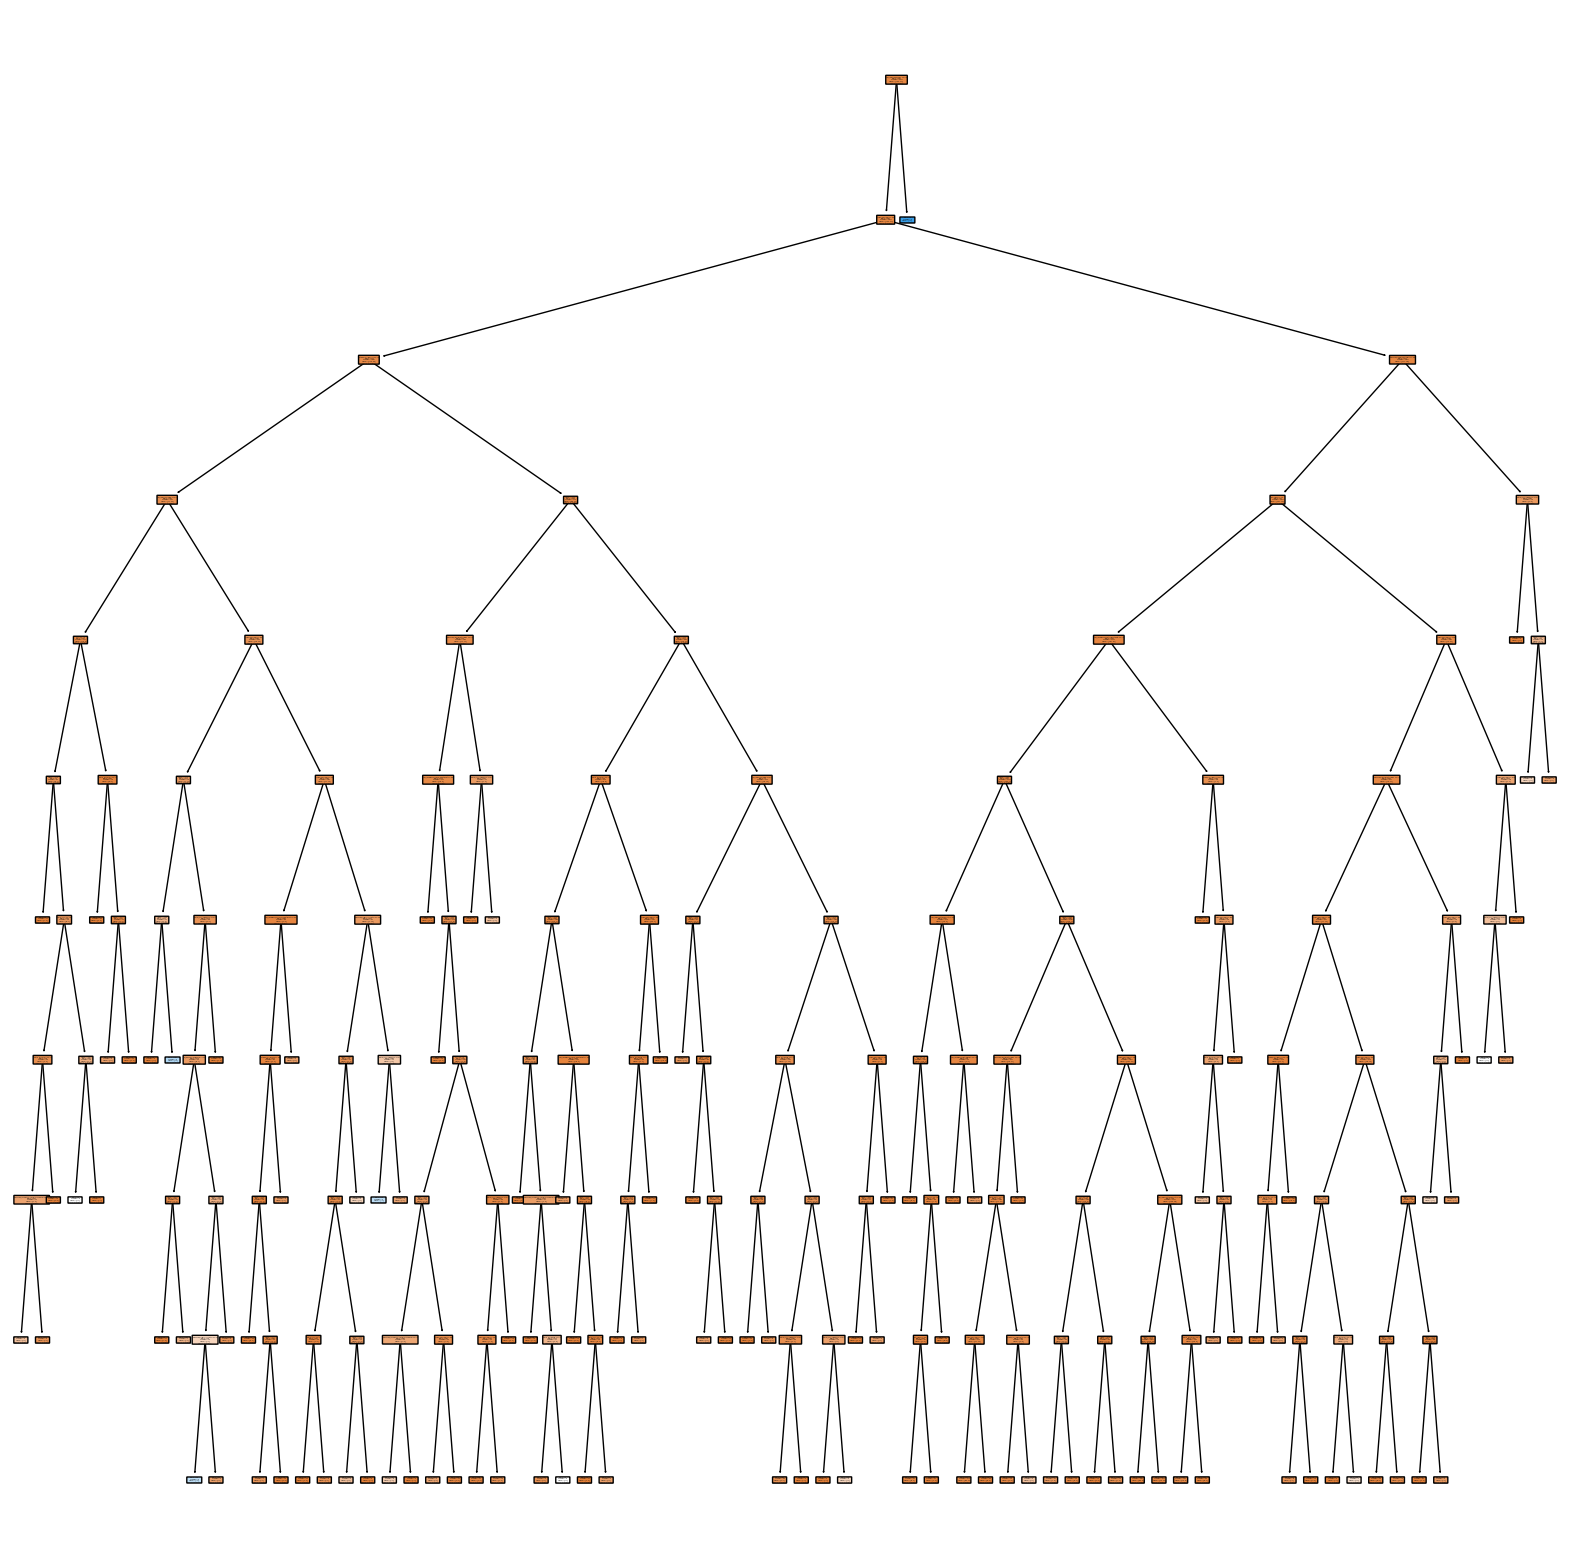

In [57]:
plt.figure(figsize=[20,20])
plot_tree(clf_ajustado,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=list(X_train.columns));

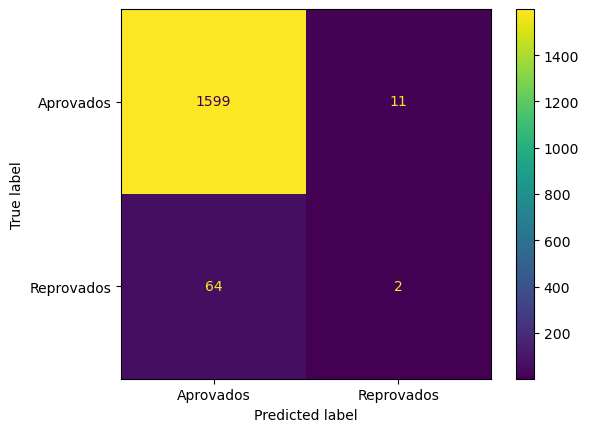

In [58]:
cm = confusion_matrix(y_test, clf_ajustado.predict(X_test), labels=clf_ajustado.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [59]:
#5
X_test.shape


(1676, 28)

In [60]:
(1599+11) / 1676

0.9606205250596659